In [2]:
#Import dependencies
from nn import NeuralNetwork
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [4]:
#Load and split digits dataset
split_percent = .33

digits = load_digits()
y = digits['target']
X = digits['data']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_percent, random_state=42)

#Reshape dataset to fit convention used in implementation of neural net
X_train = X_train.T 
X_val = X_val.T
y_train = np.array([y_train])
y_val = np.array([y_val])

# Rationale for hyperparameter choice
For the most part, hyperparameters were chosen via trail and error. With regards to the architecture of the autoencoder, the dimensions of the input, output, and hidden layer were kept constant. I experimented with various activation functions, namely sigmoid and ReLu. I found that the ReLu activation activation function produced the best results. This makes intuitive sense, as the value of pixel intensities are numerics greater than 0. I also experimented with different initial weights, as the selection of a starting point for gradient descent can influence the minima converged on. After testing two random seeds, I found that random seed 2 gave me the most favorable results. To avoid instability, I decided to use relatively large batch sizes and a relatively small learning rate for gradient descent. To find the optimal number of epochs, I incrementally increased number of training iterations from 1,000 to 10,000. I found that further increases above 10,000 epochs did not produce meaningful improvement in validation loss.

In [5]:
#Define hyperparams
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]
lr = 0.01
seed1 = 1
seed2 = 2
batch_size = 500
epochs = 10000
loss_function = 'mse'

In [6]:
#Train autoencoder using digits dataset
autoencoder = NeuralNetwork(nn_arch, lr, seed2, batch_size, epochs, loss_function)
train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

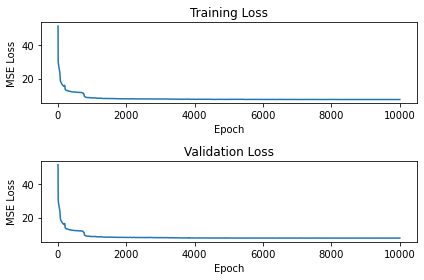

In [7]:
#Plot losses
epochs = np.linspace(1, len(train_loss), len(train_loss))
fig,axs = plt.subplots(2)
axs[0].plot(epochs, train_loss)
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE Loss')

axs[1].plot(epochs, val_loss)
axs[1].set_title('Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MSE Loss')
fig.tight_layout()
plt.show()

Training Loss: 7.308508521490605
Validation Loss: 7.886006934648051
Reconstruction Error: 1.277144820142198



<Figure size 432x288 with 0 Axes>

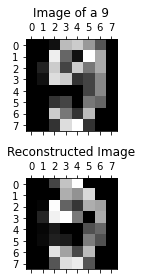

In [10]:
#Plot final training and validation loss as well as final reconstruction error
predictions = autoencoder.predict(X_val)
reconstruction_error = np.mean(np.absolute(predictions - X_val))

print(f'Training Loss: {train_loss[-1]}')
print(f'Validation Loss: {val_loss[-1]}')
print(f'Reconstruction Error: {reconstruction_error}')
print('')

#Visualize a representative validation example and its reconstruction
predictions = autoencoder.predict(X_val)
i = np.random.randint(0,X_val.shape[1])
sample = X_val[:,i]
reconstruction = predictions[:,i]
number = y_val[0,i]

plt.gray()
fig,ax = plt.subplots(2)
ax[0].matshow(sample.reshape(8,8))
ax[0].set_title(f'Image of a {number}')

ax[1].matshow(reconstruction.reshape(8,8))
ax[1].set_title('Reconstructed Image')
fig.tight_layout()